In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from bdateutil import isbday
from datetime import datetime,date
%matplotlib inline

### PART 1: pivot data

In [2]:
df = pd.read_csv('BetaExample.csv')
print(df.head())
df['DATE'].head(3)

       DATE TICKER        RM         R
0  1990/1/2    IBM  0.017799  0.041169
1  1990/1/3    IBM -0.002586  0.008929
2  1990/1/4    IBM -0.008613  0.011378
3  1990/1/5    IBM -0.009756 -0.002500
4  1990/1/8    IBM  0.004514  0.006266


0    1990/1/2
1    1990/1/3
2    1990/1/4
Name: DATE, dtype: object

In [3]:
df = pd.pivot_table(df, index = ['DATE'], columns = ['TICKER'], values = ['R','RM'])
df = df.reset_index()
df.head()

DATE         R                       RM                    
TICKER                 AAPL       IBM TSLA      AAPL       IBM      TSLA
0       1990/1/10 -0.043189 -0.003774  NaN -0.006607 -0.006607 -0.006607
1       1990/1/11 -0.041667  0.008838  NaN  0.003513  0.003513  0.003513
2       1990/1/12  0.000000 -0.020025  NaN -0.024675 -0.024675 -0.024675
3       1990/1/15 -0.007246  0.002554  NaN -0.008619 -0.008619 -0.008619
4       1990/1/16  0.018248  0.020382  NaN  0.011128  0.011128  0.011128

In [4]:
print(df['R']['AAPL'].head(3))
print(df['R'].head(3))
print(df['DATE'].head(3))

0   -0.043189
1   -0.041667
2    0.000000
Name: AAPL, dtype: float64
TICKER      AAPL       IBM  TSLA
0      -0.043189 -0.003774   NaN
1      -0.041667  0.008838   NaN
2       0.000000 -0.020025   NaN
0    1990/1/10
1    1990/1/11
2    1990/1/12
Name: DATE, dtype: object


In [84]:
#grp = df.groupby(['TICKER'])
#print(grp.head())

           DATE TICKER        RM         R
0      1990/1/2    IBM  0.017799  0.041169
1      1990/1/3    IBM -0.002586  0.008929
2      1990/1/4    IBM -0.008613  0.011378
3      1990/1/5    IBM -0.009756 -0.002500
4      1990/1/8    IBM  0.004514  0.006266
6552   1990/1/2   AAPL  0.017799  0.056738
6553   1990/1/3   AAPL -0.002586  0.006711
6554   1990/1/4   AAPL -0.008613  0.003333
6555   1990/1/5   AAPL -0.009756  0.003322
6556   1990/1/8   AAPL  0.004514  0.006623
13104  1990/1/2   TSLA  0.017799       NaN
13105  1990/1/3   TSLA -0.002586       NaN
13106  1990/1/4   TSLA -0.008613       NaN
13107  1990/1/5   TSLA -0.009756       NaN
13108  1990/1/8   TSLA  0.004514       NaN


### PART 2: clean data
#### 1. check for outliers
#### 2. check business day

In [5]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [2]:
data = pd.read_table('foo.csv', sep = ',')
print(data.head())

        DATE      AAPL       IBM  TSLA        RM
0  1990/1/10 -0.043189 -0.003774   NaN -0.006607
1  1990/1/11 -0.041667  0.008838   NaN  0.003513
2  1990/1/12  0.000000 -0.020025   NaN -0.024675
3  1990/1/15 -0.007246  0.002554   NaN -0.008619
4  1990/1/16  0.018248  0.020382   NaN  0.011128


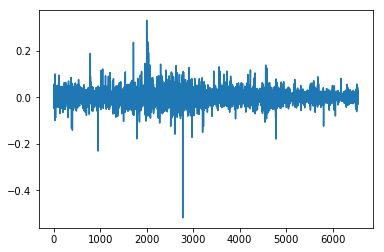

In [3]:
plt.plot(data['AAPL'])

In [4]:
def erase(colnames, data):
    mean = []
    std = []
    for tck in colnames:
        mean.append(data[tck].mean())
        std.append(data[tck].std())
    for i in range(len(data.index)):
        if not isbday(datetime.strptime(data['DATE'][i], '%Y/%m/%d')):
            data = data.drop([i])
            break
        for j in range(3):
            tck = colnames[j]
            if math.isnan(data[tck][i]):
                data = data.drop([i])
                break
            elif abs(data[tck][i] - mean[j]) >= 3 * std[j]:
                data = data.drop([i])
                break
    return data

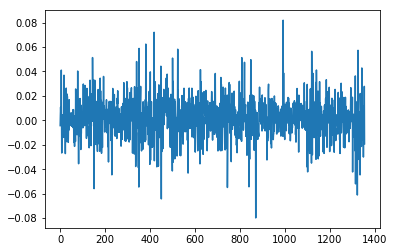

In [5]:
colnames = ['AAPL', 'IBM', 'TSLA']
cleaned_data = erase(colnames, data)
nrow = len(cleaned_data.index)
cleaned_data.index = range(nrow)
plt.plot(cleaned_data['AAPL'])

## PART 3 average return and covariance matrix


In [28]:
for tck in colnames:
    

0        2010/10/1
1       2010/10/11
2       2010/10/12
3       2010/10/13
4       2010/10/14
5       2010/10/15
6       2010/10/18
7       2010/10/19
8       2010/10/20
9       2010/10/21
10      2010/10/22
11      2010/10/25
12      2010/10/26
13      2010/10/27
14      2010/10/28
15      2010/10/29
16       2010/10/4
17       2010/10/5
18       2010/10/6
19       2010/10/7
20       2010/10/8
21       2010/11/1
22      2010/11/11
23      2010/11/12
24      2010/11/15
25      2010/11/16
26      2010/11/17
27      2010/11/18
28      2010/11/19
29       2010/11/2
           ...    
1325     2015/8/26
1326     2015/8/27
1327     2015/8/28
1328      2015/8/3
1329     2015/8/31
1330      2015/8/4
1331      2015/8/5
1332      2015/8/6
1333      2015/8/7
1334      2015/9/1
1335     2015/9/10
1336     2015/9/11
1337     2015/9/14
1338     2015/9/15
1339     2015/9/16
1340     2015/9/17
1341     2015/9/18
1342      2015/9/2
1343     2015/9/21
1344     2015/9/22
1345     2015/9/23
1346     201

In [204]:
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6542, 6543, 6544, 6545, 6546, 6547, 6548, 6549, 6550, 6551],
           dtype='int64', length=6467)